In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
df = pd.read_csv("data/Reviews.csv")
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


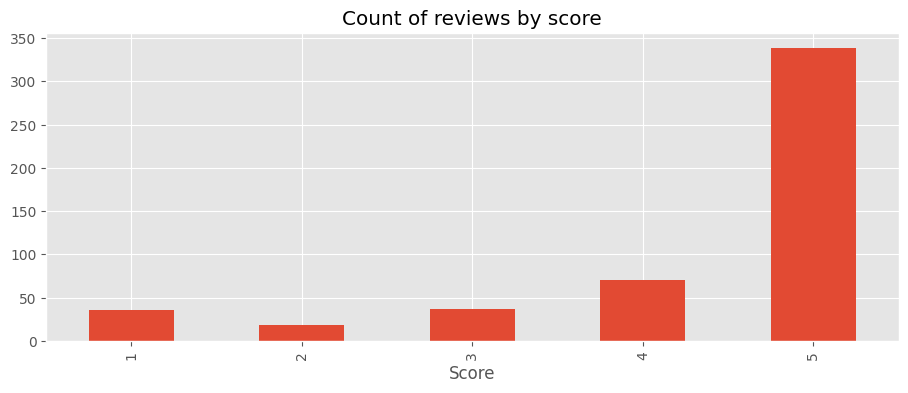

In [4]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of reviews by score', figsize=(11,4))
ax.set_xlabel('Score')
plt.show()

In [5]:
example = df['Text'][75]
print(example)

No tea flavor at all. Just whole brunch of artifial flavors. It is not returnable. I wasted 20+ bucks.


In [6]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['No', 'tea', 'flavor', 'at', 'all', '.', 'Just', 'whole', 'brunch', 'of']

In [7]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('No', 'DT'),
 ('tea', 'NN'),
 ('flavor', 'NN'),
 ('at', 'IN'),
 ('all', 'DT'),
 ('.', '.'),
 ('Just', 'NNP'),
 ('whole', 'JJ'),
 ('brunch', 'NN'),
 ('of', 'IN')]

In [8]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  No/DT
  tea/NN
  flavor/NN
  at/IN
  all/DT
  ./.
  Just/NNP
  whole/JJ
  brunch/NN
  of/IN
  artifial/JJ
  flavors/NNS
  ./.
  It/PRP
  is/VBZ
  not/RB
  returnable/JJ
  ./.
  I/PRP
  wasted/VBD
  20+/CD
  bucks/NNS
  ./.)


In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [10]:
# example 1
sia.polarity_scores(" I love you ")

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [11]:
# example 2 
sia.polarity_scores(" I hate you ")

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [12]:
sia.polarity_scores(example)

{'neg': 0.106, 'neu': 0.768, 'pos': 0.126, 'compound': 0.1098}

In [ ]:
# Run it polarity_scores on everything 
res = {}

for i , row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)


In [ ]:
# merging review data with sentiment scores
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={"index": "Id"})
vaders = vaders.merge(df, how='left')

In [23]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


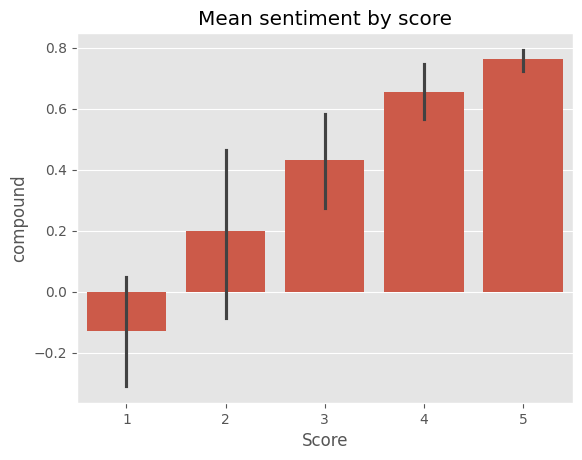

In [27]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Mean sentiment by score')
plt.show()

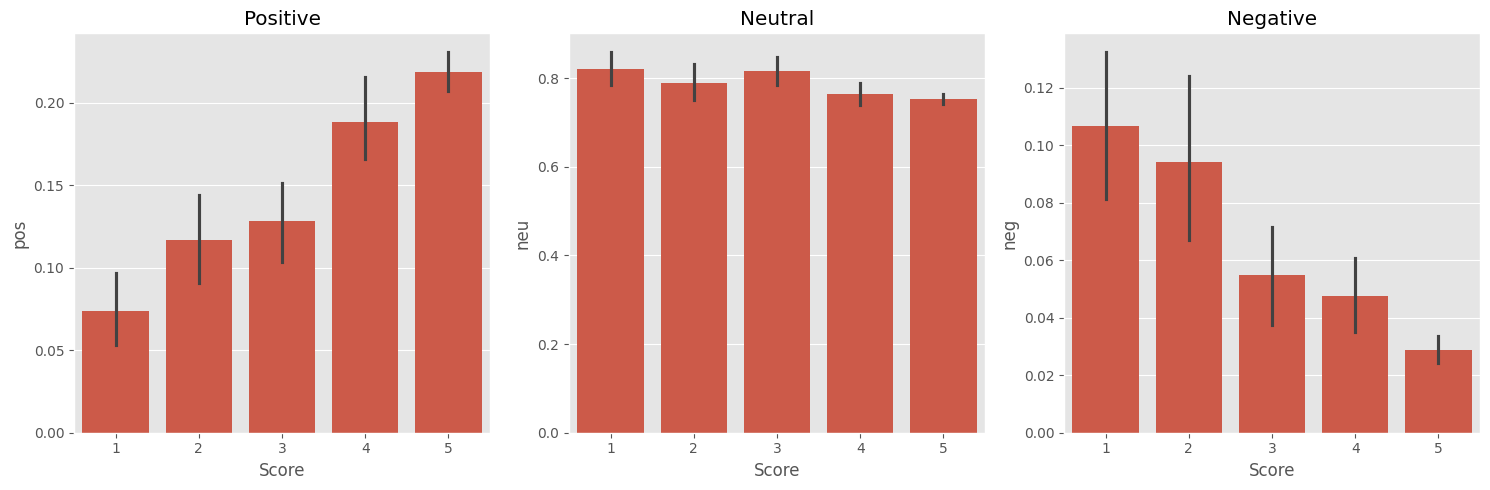

In [36]:
fig,axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x="Score", y="neg", ax=axs[2])
sns.barplot(data=vaders, x="Score", y="neu", ax=axs[1])
axs[0].set_title('Positive')
axs[2].set_title('Negative')
axs[1].set_title('Neutral')
plt.tight_layout()
plt.show()

In [38]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [43]:
# VADER example result
print(example)
sia.polarity_scores(example)

No tea flavor at all. Just whole brunch of artifial flavors. It is not returnable. I wasted 20+ bucks.


{'neg': 0.106, 'neu': 0.768, 'pos': 0.126, 'compound': 0.1098}

In [51]:
# Run for Roberta model
encoded_text = tokenizer(example, return_tensors='pt')
model_output = model(**encoded_text)
scores = model_output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    "negative": scores[0],
    "neutral": scores[1],
    "positive": scores[2]
}
print(scores_dict)

{'negative': np.float32(0.94413835), 'neutral': np.float32(0.050167944), 'positive': np.float32(0.005693676)}


In [69]:
def roberta_polarity_scores(example):
    encoded_text = tokenizer(example, return_tensors="pt")
    model_output = model(**encoded_text)
    scores = model_output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        "roberta_negative": scores[0],
        "roberta_neutral": scores[1],
        "roberta_positive": scores[2],
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try: 
        text = row["Text"]
        myid = row["Id"]
        vader_result_rename = {}
        for key, value in sia.polarity_scores(text).items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = roberta_polarity_scores(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except Exception as e:
        print(f"Broke for id {myid}")

In [71]:
results_dataframe = pd.DataFrame(res).T
results_dataframe = results_dataframe.reset_index().rename(columns={"index": "Id"})
results_dataframe = results_dataframe.merge(df, how="left")

In [72]:
results_dataframe.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_negative,roberta_neutral,roberta_positive,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


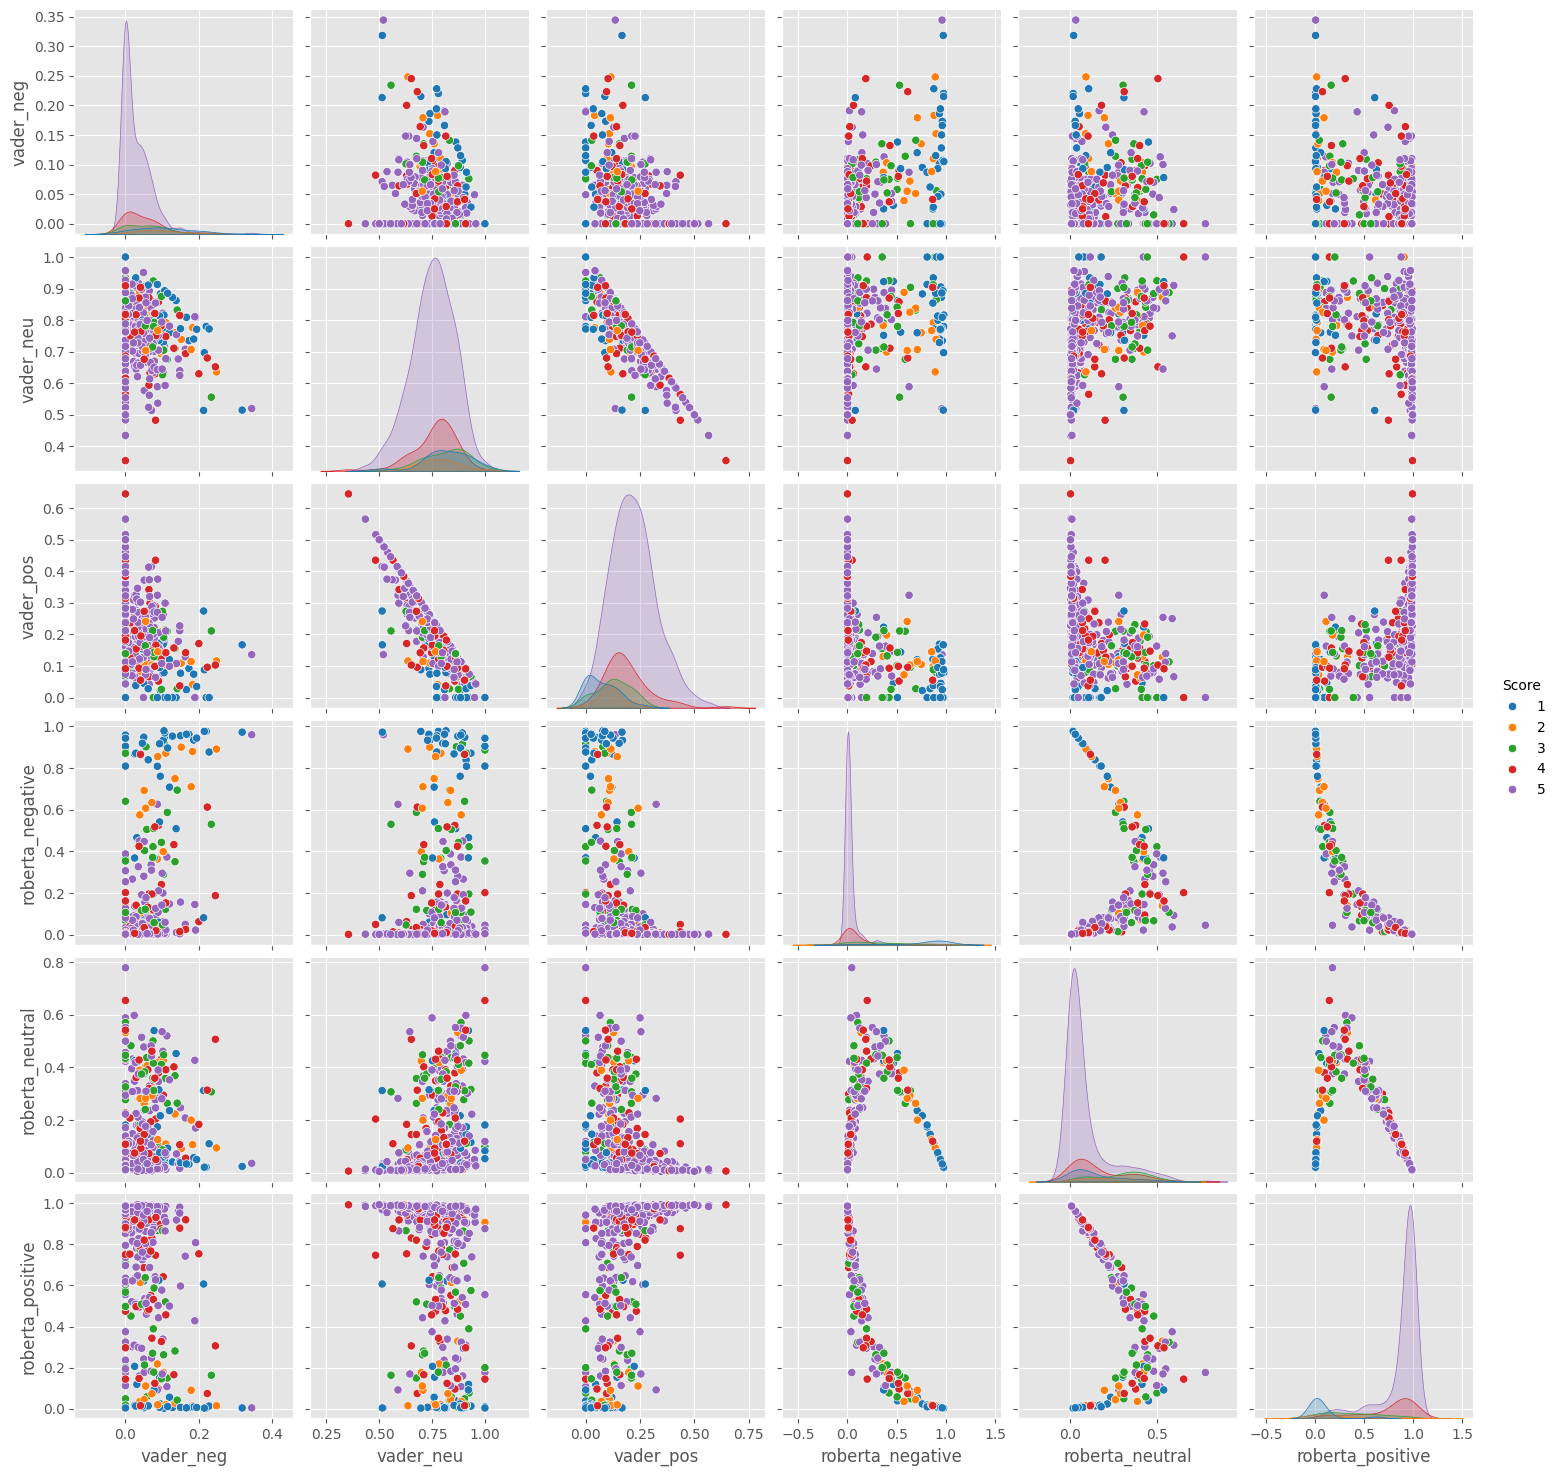

In [76]:
# Plotting the results
sns.pairplot(
    data=results_dataframe,
    vars=[
        "vader_neg",
        "vader_neu",
        "vader_pos",
        "roberta_negative",
        "roberta_neutral",
        "roberta_positive",
    ],
    hue="Score",
    palette="tab10",
)
plt.show()

In [80]:
results_dataframe.query("Score == 1").sort_values("roberta_positive", ascending=False)[
    "Text"
].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [81]:
results_dataframe.query("Score == 1").sort_values("vader_pos", ascending=False)[
    "Text"
].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [82]:
# negative of 5 star reviews
results_dataframe.query("Score == 5").sort_values("roberta_negative", ascending=False)[
    "Text"
].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [83]:
results_dataframe.query("Score == 5").sort_values("vader_neg", ascending=False)[
    "Text"
].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [ ]:
# The way of getting results from the model in 2 lines of code (*fun)
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

In [ ]:
sent_pipeline("I love you")